Motion with a constant nutation angle $\theta = \theta_0$, is known as steady precession. For $\theta$ to be constant, its first and second time derivatives must be zero, $\dot\theta = 0$ and $\ddot\theta = 0$. The equation for θ̈ is given by
\begin{equation}
    \ddot\theta = [\dot\phi(\dot\phi\cosθ - \alpha) + 1]\sin\theta.
\end{equation}
For $\ddot\theta$ to be zero, assuming $\sin(\theta_0) \neq 0$, we must have
\begin{equation}
        \dot\phi(\dot\phi\cos\theta_0 - \alpha) + 1 = 0
\end{equation}
which can be written as a quadratic equation for the precession rate $\dot\phi$
\begin{equation}
    (\cos\theta_0)\dot\phi^2 - \alpha\dot\phi + 1 = 0,
\end{equation}
which has two solutions
\begin{equation}
    \dot\phi = \frac{\alpha \pm \sqrt{\alpha^2 - 4\cos\theta_0}}{2\cos\theta_0},
\end{equation}
only when the discriminant must be positive $\alpha^2 - 4\cos\theta_0 > 0$. If this condition is met, then for a given spin parameter $\alpha$ and a fixed angle $\theta_0$, there exist a slow and a fast rates of steady precession.

In the general theory, steady precession occurs when the system is at a local minimum of the effective potential $V_{\text{eff}}(\theta)$. By setting the initial condition $\dot\theta(0) = 0$ at this angle $\theta_0$, the system has enough energy to sit at the bottom of the potential well. With no kinetic energy in the $\theta$ direction, the system remains at $\theta_0$.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def axisymmetric_top_odes(t, y, C, alpha, beta):
    '''
    Defines the system of ordinary differential equations for the axisymmetric top.
    '''
    theta, omega = y[0], y[1]
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)

    epsilon = 1e-9
    if abs(sin_theta) < epsilon:
        sin_theta = np.sign(sin_theta) * epsilon if sin_theta != 0 else epsilon

    sin_theta_sq = sin_theta**2

    phi_dot = (beta - alpha * cos_theta) / sin_theta_sq
    omega_dot = (phi_dot * (phi_dot * cos_theta - alpha) + 1) * sin_theta
    psi_dot = (alpha / C) - (phi_dot * cos_theta)
    theta_dot = omega

    return [theta_dot, omega_dot, phi_dot, psi_dot]

def run_simulation(C, y0, t_span, t_eval, alpha, beta):
    '''
    Runs the numerical simulation by solving the system of ODEs.
    '''
    solution = solve_ivp(
        fun=axisymmetric_top_odes, t_span=t_span, y0=y0,
        args=(C, alpha, beta), t_eval=t_eval, method='RK45'
    )
    return solution

Chosen parameters:
  C = 1.5
  θ₀ = 60.0°
  α = 5.0
Condition for two solutions: α² > 4cos(θ₀)
  α² = 25.00
  4cos(60.0°) = 2.00
  Condition is satisfied.
Precession rates:
  φ'_fast = 9.7958 rad/s
  φ'_slow = 0.2042 rad/s


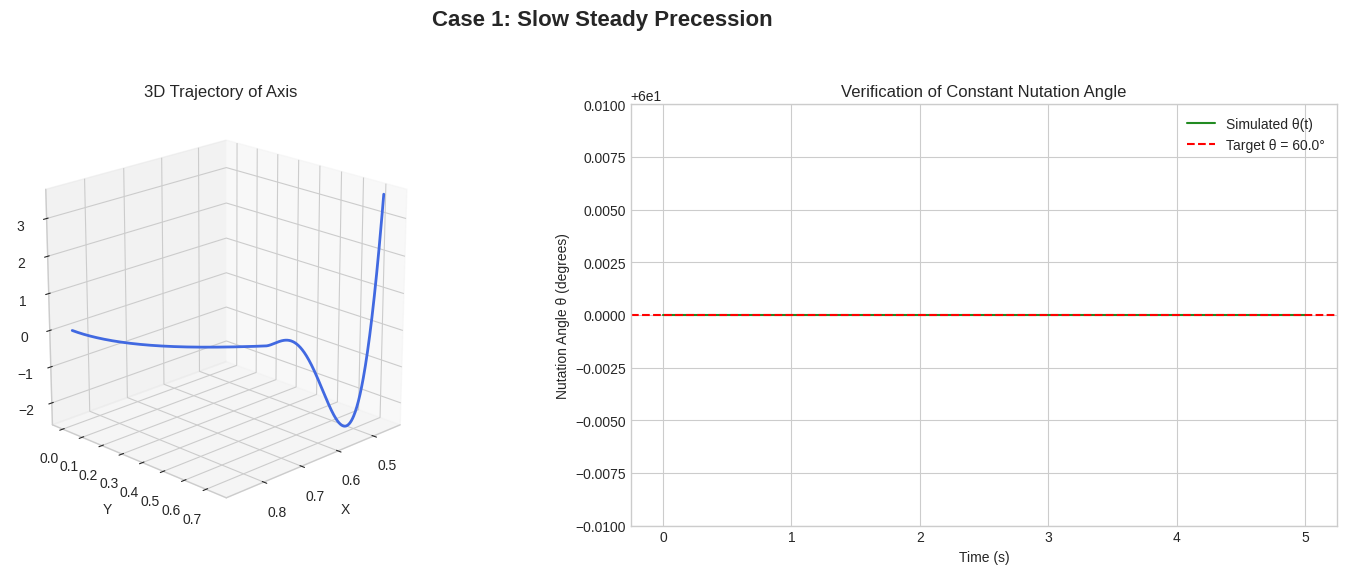

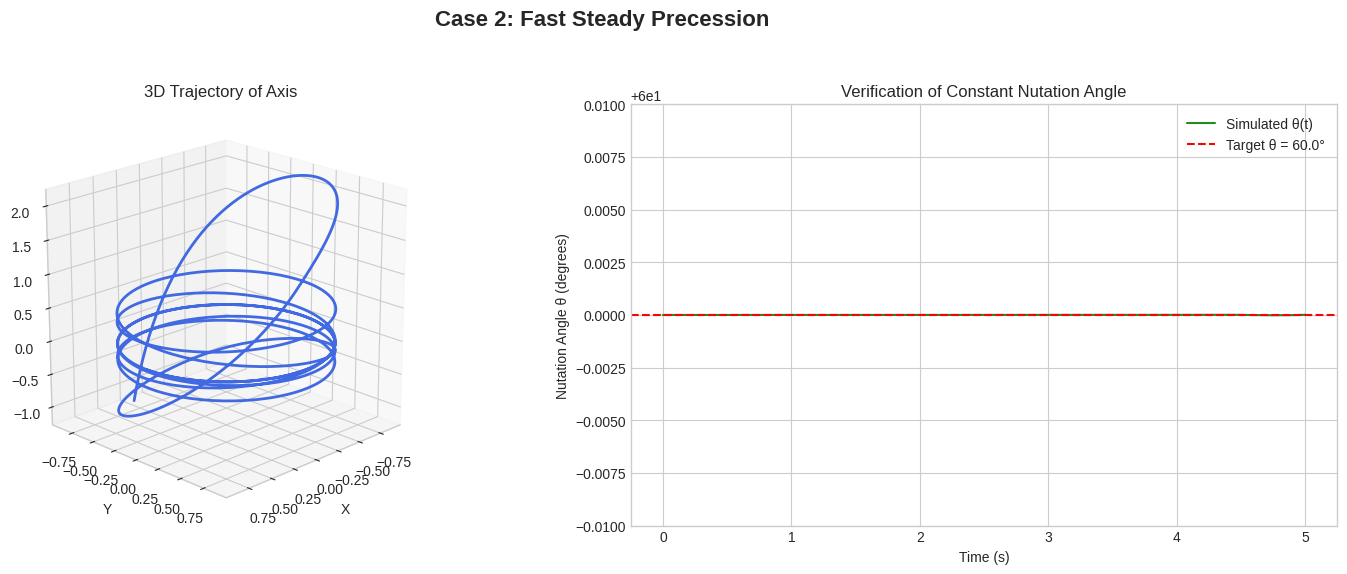

In [72]:
def plot_steady_precession(solution, title, theta_0_rad):
    '''
    Generates plots to verify steady precession, showing a constant nutation angle.
    '''
    t = solution.t
    theta, _, phi, _ = solution.y

    fig = plt.figure(figsize=(15, 6))
    fig.suptitle(title, fontsize=16, weight='bold')

    # Create subplots individually to specify the 3D projection for the first one.
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2)

    # 3D Trajectory Plot (on ax1)
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    ax1.plot(x, y, z, label="Path of top's axis", color='royalblue', linewidth=2)
    ax1.set_title("3D Trajectory of Axis")
    ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z')
    ax1.set_box_aspect([1, 1, 1])
    ax1.view_init(elev=20., azim=45) # Set a nice viewing angle

    # Nutation Angle vs. Time (on ax2, the key verification plot)
    ax2.plot(t, np.rad2deg(theta), color='forestgreen', label='Simulated θ(t)')
    ax2.axhline(np.rad2deg(theta_0_rad), color='r', linestyle='--', label=f'Target θ = {np.rad2deg(theta_0_rad):.1f}°')
    ax2.set_title("Verification of Constant Nutation Angle")
    ax2.set_xlabel("Time (s)")
    ax2.set_ylabel("Nutation Angle θ (degrees)")
    # Set y-limits very tightly to see any tiny deviation
    ax2.set_ylim(np.rad2deg(theta_0_rad) - 0.01, np.rad2deg(theta_0_rad) + 0.01)
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.94])
    plt.show()

C_val = 1.5
theta_0_deg = 60.0
theta_0_rad = np.deg2rad(theta_0_deg)
cos_theta0 = np.cos(theta_0_rad)
alpha_val = 5.0
condition_val = 4 * cos_theta0

print(f"Chosen parameters:\n  C = {C_val}\n  θ₀ = {theta_0_deg}°\n  α = {alpha_val}")
print(f"Condition for two solutions: α² > 4cos(θ₀)")
print(f"  α² = {alpha_val**2:.2f}")
print(f"  4cos({theta_0_deg}°) = {condition_val:.2f}")
if alpha_val**2 > condition_val:
    print("  Condition is satisfied.")
else:
    print("  Condition is NOT satisfied.")

discriminant = alpha_val**2 - condition_val
phi_dot_fast = (alpha_val + np.sqrt(discriminant)) / (2 * cos_theta0)
phi_dot_slow = (alpha_val - np.sqrt(discriminant)) / (2 * cos_theta0)

print(f"Precession rates:")
print(f"  φ'_fast = {phi_dot_fast:.4f} rad/s")
print(f"  φ'_slow = {phi_dot_slow:.4f} rad/s")

t_span = [0, 5]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

phi_dot_0 = phi_dot_slow
psi_dot_0 = (alpha_val / C_val) - phi_dot_0 * cos_theta0
beta_val = alpha_val * cos_theta0 + phi_dot_0 * np.sin(theta_0_rad)**2
y0 = [theta_0_rad, 0.0, 0.0, 0.0] # theta_dot is 0 for steady motion

solution_slow = run_simulation(C_val, y0, t_span, t_eval, alpha_val, beta_val)
plot_steady_precession(solution_slow, f"Case 1: Slow Steady Precession", theta_0_rad)

phi_dot_0 = phi_dot_fast
psi_dot_0 = (alpha_val / C_val) - phi_dot_0 * cos_theta0
beta_val = alpha_val * cos_theta0 + phi_dot_0 * np.sin(theta_0_rad)**2
y0 = [theta_0_rad, 0.0, 0.0, 0.0] # theta_dot is 0 for steady motion

solution_fast = run_simulation(C_val, y0, t_span, t_eval, alpha_val, beta_val)
plot_steady_precession(solution_fast, f"Case 2: Fast Steady Precession", theta_0_rad)

A sleeping top is one that spins perfectly vertically, with a constant nutation angle $\theta = 0$. The stability of this motion is investigated by analysing its response to a small perturbation.

*   If the top is stable, a small disturbance will cause it to enter a small, stable nutation. The angle $\theta$ oscillates around $0$ but remains small.
*   If the top is unstable, a small disturbance will cause the nutation angle $\theta$ to grow exponentially. The top will eventually fall over.

For the equilibrium at $\theta = 0$ to be stable, it must be a local minimum of $V_{text{eff}}(\theta)$. For $\theta \approx 0$, the constants of motion are $\alpha \approx \beta$. The effective potential simplifies to
\begin{equation}
    V_{\text{eff}}(\theta) ≈ \frac{1}{8}(\alpha^2 - 4)\theta^2 + \text{constant}
\end{equation}
For stability, the coefficient of the $\theta^2$ term must be positive. This leads to the criterion for stability $\alpha^2 > 4$ which gives a threshold between stability and instability at $\alpha^* \approx 2$.

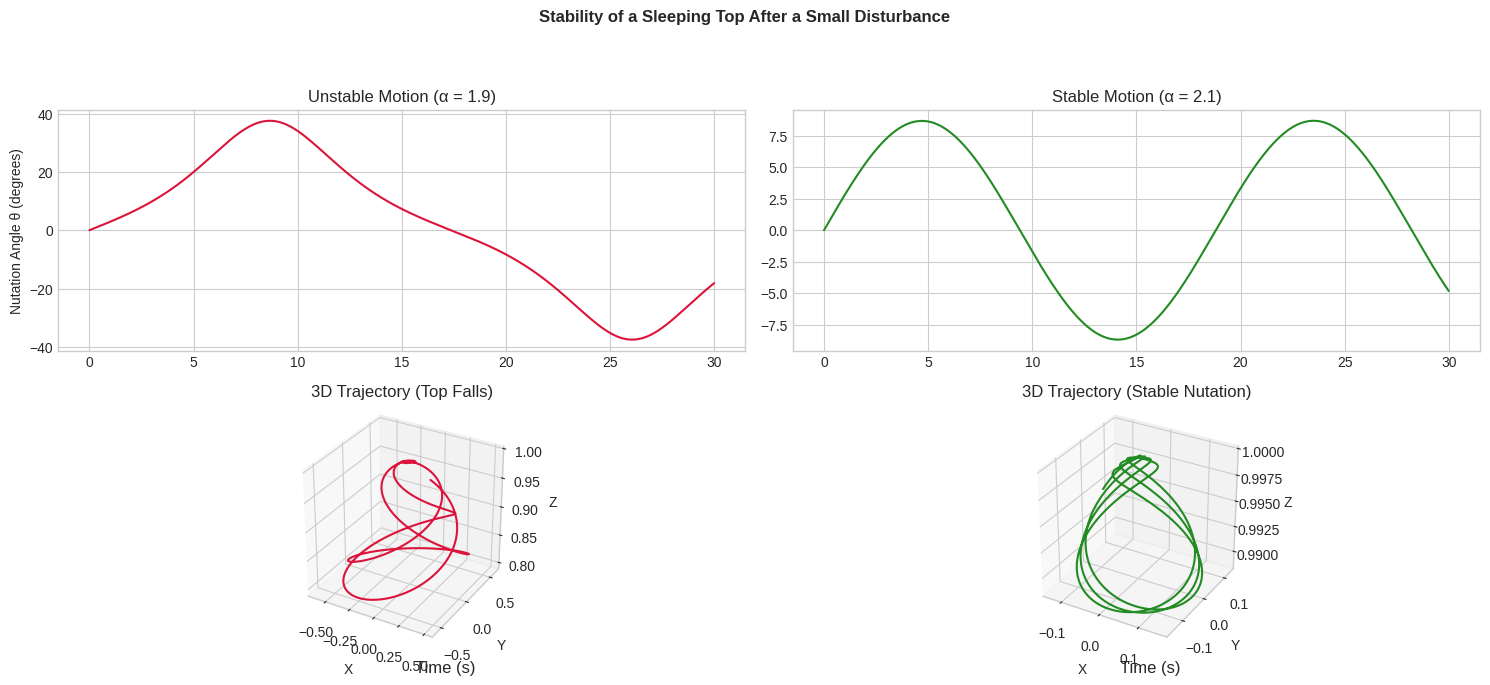

In [76]:
def plot_sleeping_top_stability(sol_unstable, sol_stable, alpha_unstable, alpha_stable):
    '''
    Generates side-by-side plots to compare the unstable and stable cases.
    '''
    fig = plt.figure(figsize=(15, 7))
    fig.suptitle("Stability of a Sleeping Top After a Small Disturbance", weight='bold')

    # --- Unstable Case Plots ---
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.plot(sol_unstable.t, np.rad2deg(sol_unstable.y[0]), color='crimson')
    ax1.set_title(f"Unstable Motion (α = {alpha_unstable})")
    ax1.set_ylabel("Nutation Angle θ (degrees)")
    ax1.grid(True)

    ax3 = fig.add_subplot(2, 2, 3, projection='3d')
    theta_u, _, phi_u, _ = sol_unstable.y
    x_u, y_u, z_u = np.sin(theta_u)*np.cos(phi_u), np.sin(theta_u)*np.sin(phi_u), np.cos(theta_u)
    ax3.plot(x_u, y_u, z_u, color='crimson')
    ax3.set_xlabel("X"); ax3.set_ylabel("Y"); ax3.set_zlabel("Z")
    ax3.set_title("3D Trajectory (Top Falls)")
    ax3.set_box_aspect([1,1,1])

    # --- Stable Case Plots ---
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.plot(sol_stable.t, np.rad2deg(sol_stable.y[0]), color='forestgreen')
    ax2.set_title(f"Stable Motion (α = {alpha_stable})")
    ax2.grid(True)

    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    theta_s, _, phi_s, _ = sol_stable.y
    x_s, y_s, z_s = np.sin(theta_s)*np.cos(phi_s), np.sin(theta_s)*np.sin(phi_s), np.cos(theta_s)
    ax4.plot(x_s, y_s, z_s, color='forestgreen')
    ax4.set_xlabel("X"); ax4.set_ylabel("Y"); ax4.set_zlabel("Z")
    ax4.set_title("3D Trajectory (Stable Nutation)")
    ax4.set_box_aspect([1,1,1])

    fig.text(0.30, 0.04, 'Time (s)', ha='center', va='center', fontsize=12)
    fig.text(0.77, 0.04, 'Time (s)', ha='center', va='center', fontsize=12)

    plt.tight_layout(rect=[0, 0.05, 1, 0.93])
    plt.show()

C_val = 1.5
t_span = [0, 30]
t_eval = np.linspace(t_span[0], t_span[1], 2000)
theta_0 = 1e-6  # Tiny initial angle
omega_0 = 0.05  # Small disturbance
initial_conditions = [theta_0, omega_0, 0.0, 0.0]

alpha_unstable = 1.9
beta_unstable = alpha_unstable
solution_unstable = run_simulation(C_val, initial_conditions, t_span, t_eval, alpha_unstable, beta_unstable)

alpha_stable = 2.1
beta_stable = alpha_stable
solution_stable = run_simulation(C_val, initial_conditions, t_span, t_eval, alpha_stable, beta_stable)

plot_sleeping_top_stability(solution_unstable, solution_stable, alpha_unstable, alpha_stable)

Take $\alpha$ and $\theta$ very small with $\dot\theta = \dot\phi = 0$. The top is released from rest at a slight tilt with a very small amount of spin. Because it has almost no angular momentum, gravity immediately dominates the motion. The top begins to fall, but the tiny initial spin creates a small gyroscopic effect. This causes the top to curve sideways as it falls, resulting ina motion where the top quickly tumbles over, tracing a curved path.

This scenario represents releasing a barely-spinning top from a tilted position with no initial nutation or precession velocity. The kinetic energy is almost entirely from the slow spin, and the potential energy is high from the tilt. With very little gyroscopic stiffness to hold it up, the top behaves much like a simple falling object, but on a path slightly deflected by its minimal rotation. It is highly unstable and falls immediately.

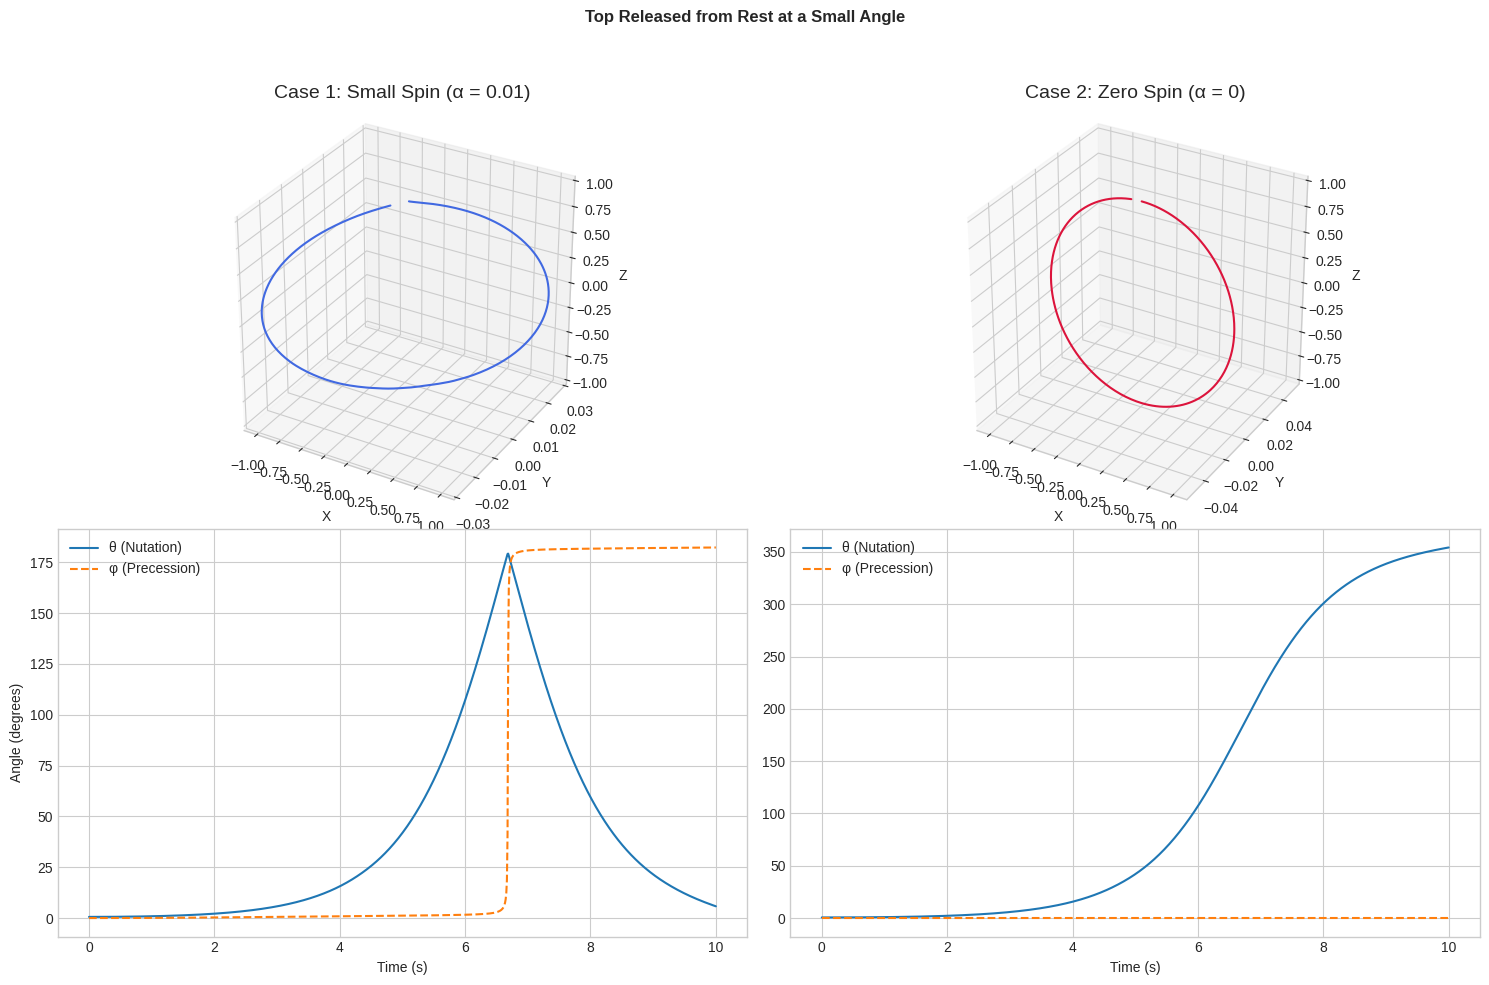

In [78]:
def plot_small_alpha_cases(sol_small_alpha, sol_zero_alpha):
    '''
    Generates side-by-side plots to compare the small alpha and zero alpha cases.
    '''
    fig = plt.figure(figsize=(15, 10))
    fig.suptitle("Top Released from Rest at a Small Angle", weight='bold')

    # --- Case 1: Small Alpha ---
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    theta_s, _, phi_s, _ = sol_small_alpha.y
    x_s, y_s, z_s = np.sin(theta_s)*np.cos(phi_s), np.sin(theta_s)*np.sin(phi_s), np.cos(theta_s)
    ax1.plot(x_s, y_s, z_s, color='royalblue')
    ax1.set_title("Case 1: Small Spin (α = 0.01)", fontsize=14)
    ax1.set_xlabel("X"); ax1.set_ylabel("Y"); ax1.set_zlabel("Z")
    ax1.set_box_aspect([1,1,1])

    ax3 = fig.add_subplot(2, 2, 3)
    ax3.plot(sol_small_alpha.t, np.rad2deg(sol_small_alpha.y[0]), label='θ (Nutation)')
    ax3.plot(sol_small_alpha.t, np.rad2deg(sol_small_alpha.y[2]), label='φ (Precession)', linestyle='--')
    ax3.set_xlabel("Time (s)")
    ax3.set_ylabel("Angle (degrees)")
    ax3.legend()
    ax3.grid(True)

    # --- Case 2: Zero Alpha ---
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')
    theta_z, _, phi_z, _ = sol_zero_alpha.y
    x_z, y_z, z_z = np.sin(theta_z)*np.cos(phi_z), np.sin(theta_z)*np.sin(phi_z), np.cos(theta_z)
    ax2.plot(x_z, y_z, z_z, color='crimson')
    ax2.set_title("Case 2: Zero Spin (α = 0)", fontsize=14)
    ax2.set_xlabel("X"); ax2.set_ylabel("Y"); ax2.set_zlabel("Z")
    ax2.set_box_aspect([1,1,1])

    ax4 = fig.add_subplot(2, 2, 4)
    ax4.plot(sol_zero_alpha.t, np.rad2deg(sol_zero_alpha.y[0]), label='θ (Nutation)')
    ax4.plot(sol_zero_alpha.t, np.rad2deg(sol_zero_alpha.y[2]), label='φ (Precession)', linestyle='--')
    ax4.set_xlabel("Time (s)")
    ax4.legend()
    ax4.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

C_val = 1.5
t_span = [0, 10]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

theta_0 = 0.01
omega_0 = 0.0
phi_dot_0 = 0.0
initial_y = [theta_0, omega_0, 0.0, 0.0]

alpha_small = 0.01
beta_small = alpha_small * np.cos(theta_0)
solution_small_alpha = run_simulation(C_val, initial_y, t_span, t_eval, alpha_small, beta_small)

alpha_zero = 0.0
beta_zero = 0.0
solution_zero_alpha = run_simulation(C_val, initial_y, t_span, t_eval, alpha_zero, beta_zero)

plot_small_alpha_cases(solution_small_alpha, solution_zero_alpha)

Now set $\alpha$ to zero. The initial spin of the top $\dot\psi$ is also zero. With $\dot\theta$ and $\dot\phi$ also zero, the top is released from rest with zero total angular momentum. As it moves, the precession angle $\phi$ remains zero and the nutation angle $\theta$ oscillates back and forth. The trajectory is a simple arc in a single vertical plane.

This case is physically identical to a simple pendulum. A top with no spin has no gyroscopic properties. It is simply a rigid body fixed at a pivot point and subject to gravity. When released from rest, it will swing back and forth in a plane. The nutation angle $\theta$ is equivalent to the pendulum's angle of swing. There is no force to cause motion in the $\phi$ direction, or precession, so the top does not rotate around the vertical axis.